# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [1]:
from core import crossval_table, get_color_fader
from Gaugi import mkdir_p
from copy import copy
from pprint import pprint
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt

import atlas_mpl_style as ampl
ampl.use_atlas_style()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...


In [2]:
mkdir_p('output/crossval')
mkdir_p('output/training')

In [3]:
def create_op_dict(op, decoration='reference'):
    
    d = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              
              # op
              'pd_ref'    : decoration+"/"+op+"/pd_ref#0",
              'fa_ref'    : decoration+"/"+op+"/fa_ref#0",
              'sp_ref'    : decoration+"/"+op+"/sp_ref",
              'pd_val'    : decoration+"/"+op+"/pd_val#0",
              'fa_val'    : decoration+"/"+op+"/fa_val#0",
              'sp_val'    : decoration+"/"+op+"/sp_val",
              'pd_op'     : decoration+"/"+op+"/pd_op#0",
              'fa_op'     : decoration+"/"+op+"/fa_op#0",
              'sp_op'     : decoration+"/"+op+"/sp_op",

              # Counts
              'pd_ref_passed'    : decoration+"/"+op+"/pd_ref#1",
              'fa_ref_passed'    : decoration+"/"+op+"/fa_ref#1",
              'pd_ref_total'     : decoration+"/"+op+"/pd_ref#2",
              'fa_ref_total'     : decoration+"/"+op+"/fa_ref#2",
              'pd_val_passed'    : decoration+"/"+op+"/pd_val#1",
              'fa_val_passed'    : decoration+"/"+op+"/fa_val#1",
              'pd_val_total'     : decoration+"/"+op+"/pd_val#2",
              'fa_val_total'     : decoration+"/"+op+"/fa_val#2",
              'pd_op_passed'     : decoration+"/"+op+"/pd_op#1",
              'fa_op_passed'     : decoration+"/"+op+"/fa_op#1",
              'pd_op_total'      : decoration+"/"+op+"/pd_op#2",
              'fa_op_total'      : decoration+"/"+op+"/fa_op#2",
    })
    return d


op_names = ['tight', 'medium', 'loose', 'vloose']

tuned_info = collections.OrderedDict({})
for op in op_names:
    tuned_info[op] = create_op_dict(op, "reference")

In [4]:
etbins  = [4, 7, 10, 15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [5]:
cv_data_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_mc_v1_r0 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_mc_v1_r1 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [6]:
cv_data_v8.fill(  '/home/jodafons/public/cern_data/tunings/Run2/Zee/v8/r1/*/*/*.npz' , 'run2-v8' )
cv_mc_v1_r0.fill(  '/home/jodafons/public/cern_data/tunings/Run3/Zee/v1/r0/*/*/*.npz' , 'run3-v1-r0' )
cv_mc_v1_r1.fill(  '/home/jodafons/public/cern_data/tunings/Run3/Zee/v1/r1/*/*/*.npz' , 'run3-v1-r1' )

Reading run3-v1-r1...: 100%|██████████| 500/500 [00:13<00:00, 38.46it/s]


2022-06-24 10:12:11,726 | Py.crossval_table                       INFO Reading file for run2-v8 tag from /home/jodafons/public/cern_data/tunings/Run2/Zee/v8/r1/*/*/*.npz
2022-06-24 10:12:11,727 | Py.crossval_table                       INFO There are 4997 files for this task...
2022-06-24 10:12:11,727 | Py.crossval_table                       INFO Filling the table... 
2022-06-24 10:13:18,055 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2022-06-24 10:13:19,720 | Py.crossval_table                       INFO Reading file for run3-v1-r0 tag from /home/jodafons/public/cern_data/tunings/Run3/Zee/v1/r0/*/*/*.npz
2022-06-24 10:13:19,721 | Py.crossval_table                       INFO There are 1250 files for this task...
2022-06-24 10:13:19,721 | Py.crossval_table                       INFO Filling the table... 
2022-06-24 10:13:23,352 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2022-06

In [20]:
#cv_data_v8.to_csv('output/crossval/table_run2_v8.csv')
#cv_mc_v1.to_csv('output/crossval/table_run3_v1.csv')

### 1.1) Get best inits and sorts:

In [7]:
best_inits_v8 = cv_data_v8.filter_inits("max_sp_val")
best_sorts_v8 = cv_data_v8.filter_sorts( best_inits_v8 , 'max_sp_op')
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==0]

In [49]:
best_inits_v1 = cv_mc_v1_r0.filter_inits("max_sp_val")
best_sorts_v1 = cv_mc_v1_r0.filter_sorts( best_inits_v1, 'max_sp_op')
best_inits_v1 = best_inits_v1.loc[best_inits_v1.model_idx==0]

In [8]:
best_inits_v1 = cv_mc_v1_r1.filter_inits("max_sp_val")
best_sorts_v1 = cv_mc_v1_r1.filter_sorts( best_inits_v1, 'max_sp_op')
best_inits_v1 = best_inits_v1.loc[best_inits_v1.model_idx==0]

In [9]:
best_inits = pd.concat([
                        best_inits_v8,
                        best_inits_v1,
                       ])
best_sorts = pd.concat([
                        best_sorts_v8,
                        best_sorts_v1,
                       ])

### 1.2) Make the table:

In [11]:
for op in op_names:
    cv_data_v8.dump_beamer_table( best_inits.loc[best_inits.op_name == op] ,  
                            'tuning_v1_'+op, 
                             title = op+' Tunings (v1)', 
                             tags = ['run2-v8','run3-v1-r1']
                           )

2022-06-24 10:29:25,591 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v1_tight.pdf latex code...
2022-06-24 10:29:26,906 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v1_medium.pdf latex code...
2022-06-24 10:29:28,110 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v1_loose.pdf latex code...
2022-06-24 10:29:29,308 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v1_vloose.pdf latex code...


In [44]:
d=cv_mc_v1.describe(best_inits.loc[best_inits.op_name == 'tight'])

In [47]:
d.loc[(d.et_bin==3)&(d.eta_bin==0)&(d.train_tag=='run3-v1')]['sp_val_mean'].values[0]*100

88.42439379943094

In [56]:
best_inits.file_name.values[0]

'/home/jodafons/public/cern_data/tunings/Run3/Zee/v1/r2/user.jodafons.task.mc21_13p6TeV.Zee_jf17.25bins.v1_et3_eta0.r2/job.0004.model_0.sort_0.init_4.npz/tunedDiscr.npz'

In [57]:
d = load(best_inits.file_name.values[0])

In [62]:
d['tunedData'][0]

{'imodel': 0,
 'sort': 0,
 'init': 4,
 'history': {'loss': [0.20921844244003296,
   0.13627366721630096,
   0.13395372033119202,
   0.13302013278007507,
   0.13227228820323944,
   0.13163438439369202,
   0.13109281659126282,
   0.13055762648582458,
   0.13004344701766968,
   0.1296207755804062,
   0.12929897010326385,
   0.12904450297355652,
   0.12883293628692627,
   0.12864820659160614,
   0.12845072150230408,
   0.12828442454338074,
   0.12816140055656433,
   0.1280723363161087,
   0.12799933552742004,
   0.1279345154762268,
   0.12787370383739471,
   0.12782734632492065,
   0.1277851015329361,
   0.12773966789245605,
   0.12769648432731628,
   0.12765945494174957,
   0.12762241065502167,
   0.12758000195026398,
   0.1275397539138794,
   0.12750586867332458,
   0.12746651470661163,
   0.1274377852678299,
   0.12739650905132294,
   0.12735684216022491,
   0.12731507420539856,
   0.12727151811122894,
   0.12722551822662354,
   0.12718406319618225,
   0.12714232504367828,
   0.12710741

In [64]:
from kepler import load_hdf, load
df = load('/home/jodafons/public/cern_data/mc21_13TeV/files/mc21_13p6TeV.801272.P8B_A14_CTEQ6L1_Jpsie3e3.Py8EG_A14NNPDF23LO_perf_JF17.15bins/mc21_13p6TeV.801272.P8B_A14_CTEQ6L1_Jpsie3e3.Py8EG_A14NNPDF23LO_perf_JF17.15bins_et0_eta0.npz')

Exception ignored in: <generator object traverse at 0x7f3ed44ca308>
Traceback (most recent call last):
  File "/home/jodafons/git_repos/run3_ringer/jodafons/build/gaugi/Gaugi/utils.py", line 255, in traverse
    except SetDepth as e:
NameError: name 'SetDepth' is not defined


In [89]:
df.columns.values

array(['RunNumber', 'avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta',
       'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1',
       'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3',
       'trig_L2_cl_weta2', 'trig_L2_cl_wstot', 'trig_L2_cl_e2tsts1',
       'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_2',
       'trig_L2_cl_ring_3', 'trig_L2_cl_ring_4', 'trig_L2_cl_ring_5',
       'trig_L2_cl_ring_6', 'trig_L2_cl_ring_7', 'trig_L2_cl_ring_8',
       'trig_L2_cl_ring_9', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11',
       'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14',
       'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17',
       'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_20',
       'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23',
       'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26',
       'trig_L2_cl_ring_27', 'trig_L2_cl_ring_28', 'trig_L2_cl_ring_29',
       'trig_L2_cl_ri

In [91]:
df.shape

(9160639, 207)

In [93]:
df.loc[df.trig_EF_cl_hascluster==True].shape

(9160639, 207)

In [83]:
df.target.unique()

array([0., 1.])

In [15]:
!mv *.tex output/crossval
!mv *.pdf output/crossval

### 1.3) Plot training curves:

In [16]:
#cv_v8.plot_training_curves( best_inits_v8, best_sorts_v8 , 'output/training/v8' )
#cv_v9.plot_training_curves( best_inits_v9, best_sorts_v9 , 'output/training/v9' )
#cv_v10.plot_training_curves( best_inits_v10, best_sorts_v10 , 'output/training/v10' )
#cv_v11.plot_training_curves( best_inits_v11,best_sorts_v11, 'output/training/v11' )
cv_v12.plot_training_curves( best_inits_v12,best_sorts_v12, 'output/training/v12' )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


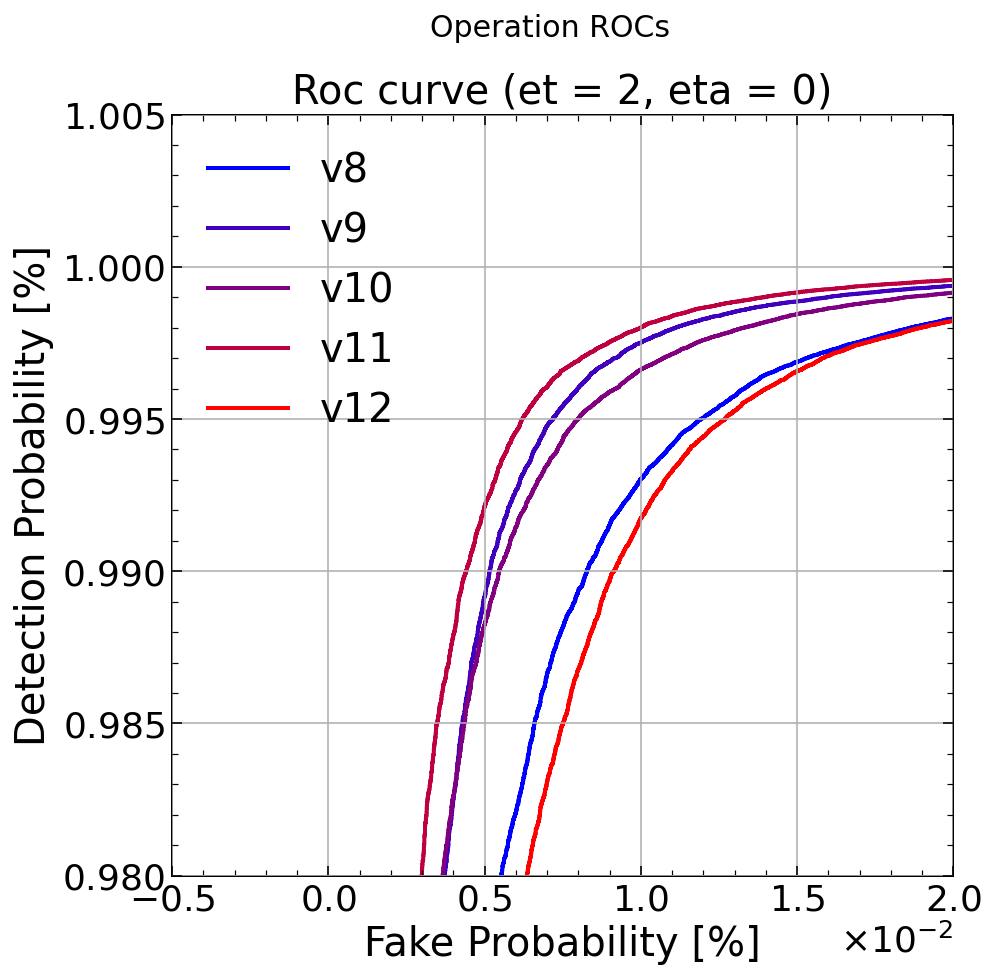

In [17]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9','v10','v11','v12'], 
                        ['v8', 'v9','v10','v11','v12'], 
                        'output/training/roc_v8_to_v12_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',5),
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

In [18]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9','v10','v11','v12'], 
                       ['v8', 'v9', 'v10','v11','v12'], 
                        'output/training/rocs_v8_to_v12.pdf',display=False, 
                       colors=get_color_fader('blue','red',5),
                       figsize=(30,30))